<a href="https://colab.research.google.com/github/SrishtiMahato/Deep_translate/blob/main/Project_1_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 139MB/s]


In [12]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


Importing the dependencies

In [13]:

import pandas as pd
housing_pd = pd.read_csv('housing.csv')
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing_pd['ocean_proximity'].value_counts()



<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [16]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [17]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [18]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [19]:
housing_pd_final = housing_pd_final[['households',	'median_income',	'median_house_value',	'<1H OCEAN',	'INLAND',	'ISLAND',	'NEAR BAY',	'NEAR OCEAN']]
housing_pd_final

,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,624.0,3.2500,355000.0,1,0,0,0,0
2151,438.0,1.9784,70700.0,0,1,0,0,0
15927,406.0,4.0132,229400.0,0,0,0,1,0
82,87.0,1.5208,112500.0,0,0,0,1,0
8161,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
10955,436.0,1.7823,205300.0,1,0,0,0,0
17289,260.0,8.5608,500001.0,1,0,0,0,0
5192,293.0,1.1326,104800.0,1,0,0,0,0
12172,477.0,2.6322,140700.0,0,1,0,0,0


In [20]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20640

In [21]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19215], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1215, 1425)

In [22]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_train

array([[6.2400e+02, 3.2500e+00, 3.5500e+05, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.3800e+02, 1.9784e+00, 7.0700e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.0600e+02, 4.0132e+00, 2.2940e+05, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [2.8600e+02, 3.1583e+00, 2.3920e+05, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.8300e+02, 2.2264e+00, 1.1250e+05, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.2400e+02, 3.9063e+00, 2.1000e+05, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [30]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 7), (18000,), (1425, 7), (1425,), (1215, 7), (1215,))

In [33]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A



In [34]:
X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

array([[ 0.32915732, -0.32671428,  1.28478554, ..., -0.68398104,
        -0.01666898, -0.35295649],
       [-0.16029225, -0.99442464, -1.18104575, ...,  1.46202884,
        -0.01666898, -0.35295649],
       [-0.24449862,  0.07403795,  0.19541371, ..., -0.68398104,
        -0.01666898,  2.83321041],
       ...,
       [-0.56027254, -0.37486546,  0.28041247, ...,  1.46202884,
        -0.01666898, -0.35295649],
       [-0.04187703, -0.86420117, -0.81850003, ..., -0.68398104,
        -0.01666898, -0.35295649],
       [-0.72342239,  0.01790533,  0.02715087, ..., -0.68398104,
        -0.01666898, -0.35295649]])

In [35]:
pd.DataFrame(X_train_preprocessed)

,0,1,2,3,4,5,6
0,0.329157,-0.326714,1.284786,1.126373,-0.683981,-0.016669,-0.352956
1,-0.160292,-0.994425,-1.181046,-0.887805,1.462029,-0.016669,-0.352956
2,-0.244499,0.074038,0.195414,-0.887805,-0.683981,-0.016669,2.833210
3,-1.083931,-1.234708,-0.818500,-0.887805,-0.683981,-0.016669,2.833210
4,-0.568167,0.686456,0.160720,1.126373,-0.683981,-0.016669,-0.352956
...,...,...,...,...,...,...,...
17995,-0.586587,0.801609,-0.358813,-0.887805,1.462029,-0.016669,-0.352956
17996,-0.757631,-0.034972,1.891920,-0.887805,-0.683981,-0.016669,-0.352956
17997,-0.560273,-0.374865,0.280412,-0.887805,1.462029,-0.016669,-0.352956
17998,-0.041877,-0.864201,-0.818500,-0.887805,-0.683981,-0.016669,-0.352956


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: >, <Axes: >]], dtype=object)

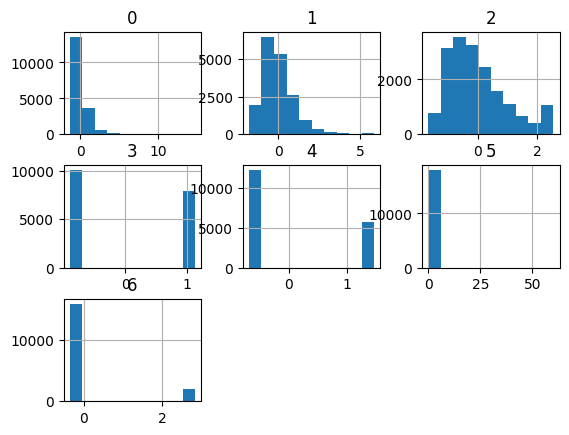

In [36]:
#histogram for all coloumns
pd.DataFrame(X_train_preprocessed).hist()

<Axes: >

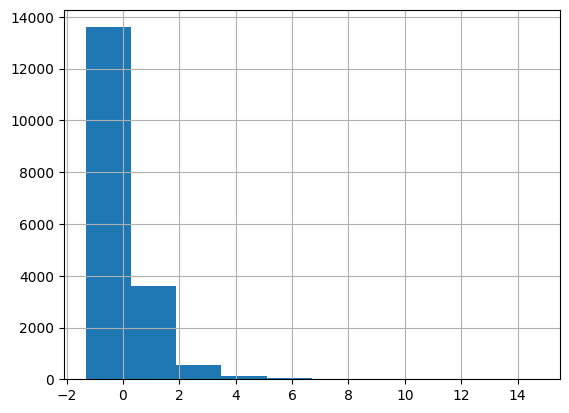

In [37]:
#for only the first column
pd.DataFrame(X_train_preprocessed)[0].hist()

In [ ]:
#mean squared error
# sum((y_hat(x) - y)^2)/n

In [38]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(1.9429960257431782e-16, 1.9399803870121756e-16)

In [43]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(0.31317460518588247, 0.34108187009171737)

In [46]:
#ensemble
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(0.24448655754716478, 0.24209287893273632)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=20).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(0.044030928550995156, 0.04032768670158288)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=10)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=10)

Epoch 1/10


ValueError: ignored

In [54]:
from tensorflow.keras.models import load_model


In [ ]:
simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

OSError: ignored

In [57]:
mse(gbr.predict(X_test), y_test, squared=False)

0.04118703395687306